<a href="https://colab.research.google.com/github/fl196-waikato/2024-MSA_Phase2-Data-Science/blob/main/MSA_Phase2_DeepLearning_codes%20and%20summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# 2. Load and Preprocess Your Data

In [4]:
from google.colab import files
uploaded = files.upload()

Saving nzmsa-2024.zip to nzmsa-2024.zip


In [6]:
import zipfile
# Replace 'your_zip_file.zip' with the name of your uploaded zip file
with zipfile.ZipFile('nzmsa-2024.zip', 'r') as zip_ref:
    zip_ref.extractall('nzmsa-2024 (1)')


In [7]:
extracted_files = os.listdir('nzmsa-2024 (1)')
print(extracted_files)

['__MACOSX', 'nzmsa-2024']


In [13]:
# Load the CSV files
train_df = pd.read_csv('nzmsa-2024 (1)/nzmsa-2024/train.csv')
sample_submission_df = pd.read_csv('nzmsa-2024 (1)/nzmsa-2024/sample_submission.csv')

# Specify directories for train and test images
train_images_dir = 'nzmsa-2024 (1)/nzmsa-2024/cifar10_images/train'
test_images_dir = 'nzmsa-2024 (1)/nzmsa-2024/cifar10_images/test'

# Function to load images from directory based on the dataframe ids
def load_images_from_dir(image_ids, directory, image_size=(32, 32)):
    images = []
    for image_id in image_ids:
        image_path = os.path.join(directory, f'image_{image_id}.png')
        image = load_img(image_path, target_size=image_size)
        image = img_to_array(image)
        images.append(image)
    return np.array(images)

# Load train and test images
X_train = load_images_from_dir(train_df['id'], train_images_dir)
y_train = to_categorical(train_df['label'], num_classes=10)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_test = load_images_from_dir(sample_submission_df['id'], test_images_dir)


# Normalize the pixel values to improve the model's performance:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [51]:
# Data augmentation artificially increases the size and diversity of the training dataset by applying random transformations to the images to prevent overfitting and improve generalization to unseen data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)



# 3. Build the Model

In [33]:
from tensorflow.keras.layers import BatchNormalization
# Build a CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 4. Train the Model

In [34]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 248s 194ms/step - accuracy: 0.3486 - loss: 2.0762 - val_accuracy: 0.3265 - val_loss: 2.1401
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 260s 192ms/step - accuracy: 0.5183 - loss: 1.3599 - val_accuracy: 0.3531 - val_loss: 1.7980
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 270s 198ms/step - accuracy: 0.5698 - loss: 1.2151 - val_accuracy: 0.3479 - val_loss: 2.1503
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 247s 186ms/step - accuracy: 0.5991 - loss: 1.1275 - val_accuracy: 0.4973 - val_loss: 1.4956
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 232s 186ms/step - accuracy: 0.6204 - loss: 1.0826 - val_accuracy: 0.2974 - val_loss: 2.5798
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 263s 187ms/step - accuracy: 0.6355 - loss: 1.0275 - val_accuracy: 0.3453 - val_loss: 2.3577
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 260s 186ms/step - accuracy: 0.6459 - loss: 1.0052 - val_accuracy: 0.5487 - val_loss: 1.3066
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 243s 195ms/step - ac

# 5. Making Predictions

In [36]:
# CNN predictions
cnn_predictions = model.predict(X_test)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)


# Save predictions to CSV (e.g., for submission)
submission_df = pd.DataFrame({
    'id': sample_submission_df['id'],
    'label': cnn_pred_labels
})
submission_df.to_csv('cnn_predictions3.csv', index=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step


In [37]:
from google.colab import files

files.download('cnn_predictions3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. Visualize Results

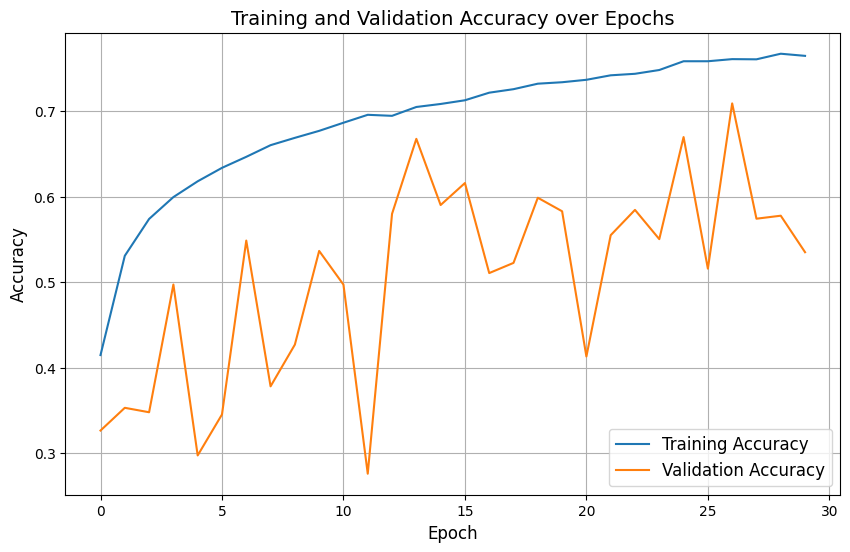

In [38]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracy over Epochs', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

# 7. Summary

In this project, I built a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The model architecture includes:

Convolutional Layers: Three Conv2D layers with 64, 128, and 256 filters, respectively. Each convolutional layer is followed by BatchNormalization, MaxPooling, and Dropout layers to enhance model performance and reduce overfitting.

Flatten Layer: Converts the 2D feature maps to a 1D vector.

Dense Layers: A Dense layer with 256 neurons and ReLU activation, followed by Dropout.

Output Layer: A Dense layer with 10 neurons and softmax activation for multi-class classification.

The model was compiled using the Adam optimizer with a learning rate of 0.001 and categorical cross-entropy loss, tracking accuracy as the metric during training. This setup is designed to effectively learn and classify the CIFAR-10 images, leveraging the CNN's ability to capture spatial features and the Adam optimizer's efficiency in training deep neural networks.